<a href="https://colab.research.google.com/github/anakingui/portfolio/blob/main/mlb_scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programa que por medio de web scrapping construye una lista con los resultados de partidos de la MLB en los ultimos 5 años

In [1]:
!pip install requests beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
import pandas as pd
import re as regex
import requests

In [4]:
import numpy as np

In [5]:
from datetime import datetime,timezone
from time import time

In [6]:
from datetime import datetime

In [7]:
# Se construye un patrón del sitio de búsqueda
url='http://www.baseball-reference.com/leagues/MLB/'

In [8]:
lista_2 = []
i=0
gamedates = []

In [9]:
# Extrae el texto que incluye el html
for j in range(2018,2024):
   html = requests.get(url+str(j)+'-schedule.shtml').text
   soup = BeautifulSoup(html, 'html.parser')

# Encontrar todos los elementos dentro de <p> </p> con la clase "game"
   games = soup.find_all('p', class_='game')
   score_regex = regex.compile(r'\((\d+)\)')
   
   for game in games:
    # Encontrar los enlaces <a> dentro del elemento <p>
    team_links = game.find_all('a')
    # La función find_all('a') busca todos los elementos <a> en el contexto de
    # game y devuelve una lista que contiene todos los elementos encontrados.
    # Cada elemento <a> encontrado se representa como un objeto de tipo Tag
    # en Beautiful Soup. Al asignar el resultado de find_all('a') a la variable
    # team_links, se crea una lista que contiene todos los elementos <a>
    # encontrados en game. La variable team_links se puede utilizar
    # posteriormente para acceder a los elementos individuales de la lista,
    # iterar sobre ellos, obtener sus atributos o realizar otras operaciones
    # específicas de una lista.

    # Para la primera iteración se obtiene una lista de 3 elementos, 
    # [<a href="/teams/BOS/2018.shtml">Boston Red Sox</a>,
    # <a href="/teams/LAD/2018.shtml">Los Angeles Dodgers</a>,
    # <a href="/boxes/LAN/LAN201810280.shtml">Boxscore</a>]
    
    # Extraer los nombres de los equipos, tomando el texto dentro del elemento
    # de la lista .strip(): Elimina los espacios en blanco al principio y al
    # final del texto. Este método se utiliza para eliminar cualquier espacio
    # en blanco adicional que pueda estar presente antes o después del texto
    # de los enlaces de los equipos.
    lista_1 = [0,0,0,0,j]    
    team1 = team_links[0].text.strip()
    team2 = team_links[1].text.strip()

    
    # Extraer las puntuaciones utilizando expresiones regulares
    scores = score_regex.findall(str(game))


    
    # Verificar si se encontraron las dos puntuaciones
    if len(scores) == 2:
        score1 = scores[0]
        score2 = scores[1]
        
        # Se construye una lista con todos los equipos y puntuaciones
        
                 
        lista_1[0]= team1
        lista_1[1]= score1
        lista_1[2]= team2
        lista_1[3]= score2
   
        lista_2.insert(i,lista_1)
        i = i+1

In [10]:
df = pd.DataFrame(lista_2, columns=['home_team','score_a','away_team','score_b','year'])

In [11]:
df.head(5)

,home_team,score_a,away_team,score_b,year
0,Colorado Rockies,2,Arizona D'Backs,8,2018
1,Philadelphia Phillies,5,Atlanta Braves,8,2018
2,Minnesota Twins,2,Baltimore Orioles,3,2018
3,Chicago White Sox,14,Kansas City Royals,7,2018
4,San Francisco Giants,1,Los Angeles Dodgers,0,2018


In [12]:
df['score_a'] = df['score_a'].astype(int)
df['score_b'] = df['score_b'].astype(int)

In [23]:
df['delta'] = abs(df['score_b']-df['score_a'])

In [24]:
df.head(5)

,home_team,score_a,away_team,score_b,year,delta
0,Colorado Rockies,2,Arizona D'Backs,8,2018,6
1,Philadelphia Phillies,5,Atlanta Braves,8,2018,3
2,Minnesota Twins,2,Baltimore Orioles,3,2018,1
3,Chicago White Sox,14,Kansas City Royals,7,2018,7
4,San Francisco Giants,1,Los Angeles Dodgers,0,2018,1


In [25]:
Yankees = df[(df['home_team'] == 'New York Yankees')|(df['away_team'] == 'New York Yankees')]

In [26]:
Yankees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 12 to 11625
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   home_team  795 non-null    object
 1   score_a    795 non-null    int64 
 2   away_team  795 non-null    object
 3   score_b    795 non-null    int64 
 4   year       795 non-null    int64 
 5   delta      795 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 43.5+ KB


In [27]:
Yankeevazulejo =Yankees[(Yankees['home_team'] == 'Toronto Blue Jays')|
                 (Yankees['away_team'] == 'Toronto Blue Jays')]

In [28]:
Yankeevazulejo

,home_team,score_a,away_team,score_b,year,delta
12,New York Yankees,6,Toronto Blue Jays,1,2018,5
23,New York Yankees,4,Toronto Blue Jays,2,2018,2
37,New York Yankees,3,Toronto Blue Jays,5,2018,2
49,New York Yankees,4,Toronto Blue Jays,7,2018,3
265,Toronto Blue Jays,3,New York Yankees,4,2018,1
...,...,...,...,...,...,...
11141,Toronto Blue Jays,5,New York Yankees,1,2023,4
11437,New York Yankees,7,Toronto Blue Jays,4,2023,3
11453,New York Yankees,6,Toronto Blue Jays,3,2023,3
11468,New York Yankees,0,Toronto Blue Jays,3,2023,3


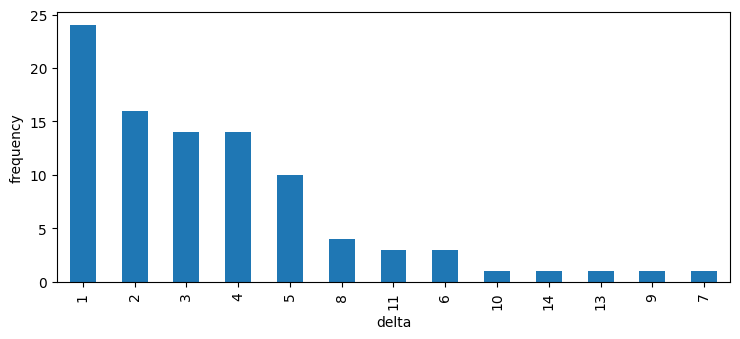

In [29]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

Yankeevazulejo['delta'].value_counts().plot(ax=ax, kind='bar', xlabel='delta', ylabel='frequency')

plt.show()

In [21]:
import seaborn as sns

<Axes: xlabel='delta', ylabel='count'>

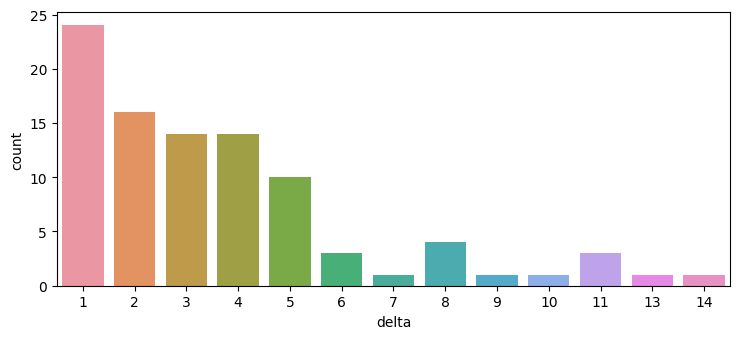

In [30]:
sns.countplot(x=Yankeevazulejo["delta"])
